# File and libraries

In [38]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_scaling_input.csv'


file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [39]:
%run "scripts/dslabs_functions.py"


# Data functions

In [40]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [41]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.6

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           427 non-null    float64
 1   28-day active users              427 non-null    float64
 2   Events per session               427 non-null    float64
 3   Item view events                 427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   First time purchasers            427 non-null    float64
 10  Average session duration         427 non-null    float64
 11  ARPU                             427 non-null    float64
 12  ARP

# Differentiation - no diff

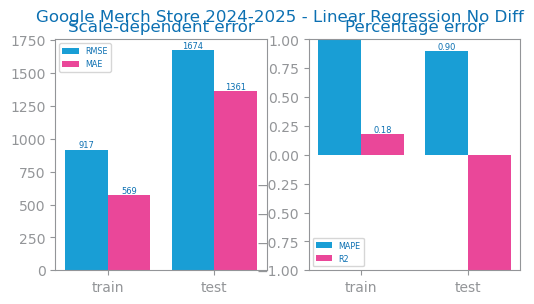

In [42]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Diff")
savefig(f"images/{file_tag}_linear_regression_eval_no_diff.png")

## no differentiating plot

<Axes: xlabel='Date', ylabel='Sessions'>

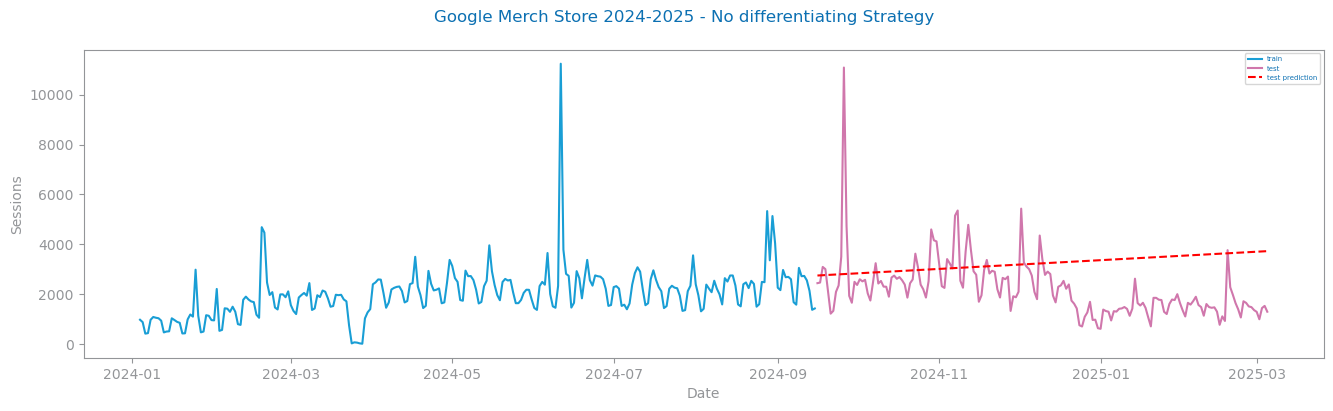

In [43]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No differentiating Strategy",
    xlabel='Date',
    ylabel=target,
)

# Differentiation1 - Standard Scaler

## Differentiation1 strategy Application

In [44]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_diff=df_copy.diff().dropna()

    return df_diff


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Seven-day active users,28-day active users,Events per session,Item view events,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,First time purchasers,...,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day,Sessions
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,0.033203,0.011017,0.005135,-0.005432,0.006433,-0.000855,0.007485,0.154204,0.039455,0.003497,...,-0.001878,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,-95.0
2024-01-06,0.016017,0.005315,-0.130585,-0.023252,-0.036958,-0.023504,-0.047904,-0.228927,-0.088139,-0.041958,...,-0.014645,0.000000,-0.2,0.0,0.166667,1.0,0.0,0.0,0.0,-461.0
2024-01-07,0.016932,0.005618,0.121758,0.001224,0.005676,0.002991,0.011976,-0.035076,0.002462,0.008741,...,0.001878,0.000000,0.0,0.2,0.166667,0.0,0.0,0.0,0.0,20.0
2024-01-08,0.033966,0.011270,-0.089838,0.022505,0.013749,0.007265,0.008982,0.034252,0.013477,0.010490,...,0.016898,0.000000,0.0,0.0,-1.000000,-1.0,0.0,0.0,0.0,535.0
2024-01-09,0.038898,0.012907,0.077543,0.002448,0.009082,0.023504,0.023952,0.161967,0.057063,0.024476,...,-0.001502,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.001983,-0.000709,-0.176982,-0.015819,-0.022074,-0.035897,-0.035928,-0.079827,-0.049210,-0.029720,...,-0.042433,0.333333,0.2,-0.8,0.166667,1.0,0.0,0.0,0.0,-71.0
2025-03-02,-0.002746,-0.001518,0.109053,0.002806,0.002270,0.008547,0.014970,-0.036132,0.008796,0.008741,...,-0.002629,0.000000,0.0,0.2,0.166667,0.0,0.0,0.0,0.0,-296.0
2025-03-03,-0.012508,-0.004319,0.138742,0.021491,0.023587,0.037607,0.016467,0.128223,0.037345,0.019231,...,0.055952,0.000000,0.0,0.0,-1.000000,-1.0,0.0,0.0,0.0,449.0


## Differentiation evaluate

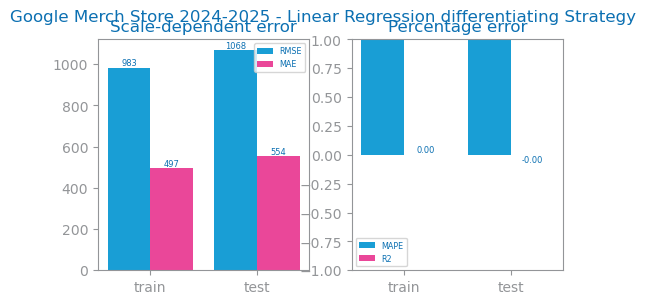

In [45]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_1 = train_1.drop(columns=[target])
# trnY_1 = train_1[target]
# tstX_1 = test_1.drop(columns=[target])
# tstY_1 = test_1[target]


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression differentiating Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Differentiation1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

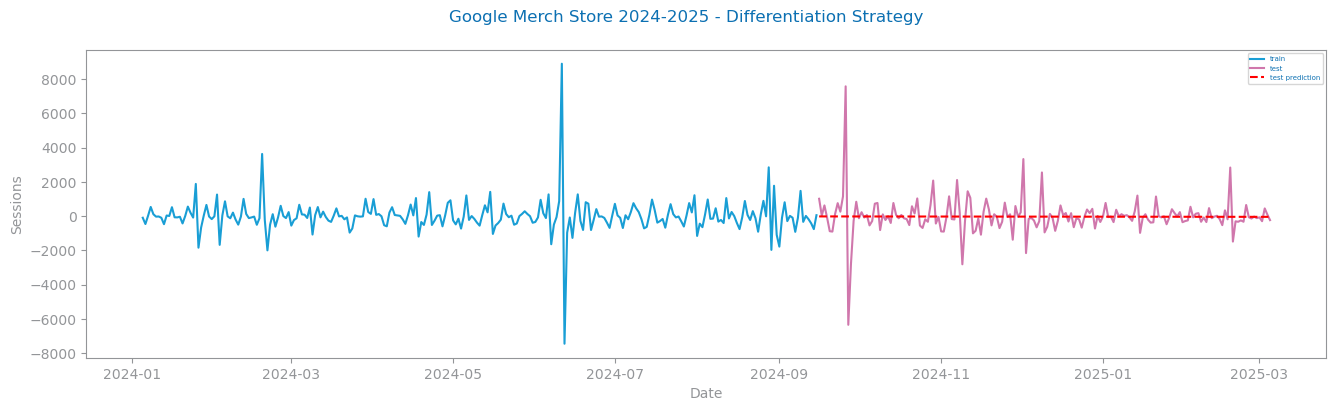

In [46]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Differentiation Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Differentiation", "Differentiation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                Model          MAE           MSE         RMSE        R²  \
0  No Differentiation  1361.017119  2.801436e+06  1673.749162 -1.082406   
1     Differentiation   553.956020  1.139806e+06  1067.617187 -0.000582   

           MAPE  
0  8.954616e+01  
1  2.138292e+11  


# save to csv

In [48]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_diff_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Seven-day active users', '28-day active users',
       'Events per session', 'Item view events', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'First time purchasers', 'Average session duration', 'ARPU', 'ARPPU',
       'Views per user', 'Total users', 'Promotion views', 'Promotion clicks',
       'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessi